          A         B         C         D         E
0  0.394180  0.535198  0.082616  0.238935  0.076693
1  0.306798  0.857032  0.463890  0.714073  0.030768
2  0.306977  0.135640  0.505534  0.469606  0.305084
3  0.237612  0.931854  0.238487  0.118636  0.969852
4  0.100333  0.563753  0.698076  0.813334  0.057204
5  0.211852  0.683879  0.229636  0.058097  0.817334
6  0.568644  0.311321  0.345899  0.211195  0.883929
7  0.218306  0.394774  0.761131  0.819880  0.294029
8  0.982226  0.677934  0.073996  0.887418  0.090980
9  0.264851  0.562494  0.856948  0.186101  0.750973 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.359178   0.565388   0.425621   0.451727   0.427684
std     0.251879   0.241598   0.279239   0.327423   0.383363
min     0.100333   0.135640   0.073996   0.058097   0.030768
25%     0.223133   0.429880   0.231849   0.192375   0.080264
50%     0.285824   0.563124   0.404895   0.354271   0.299556

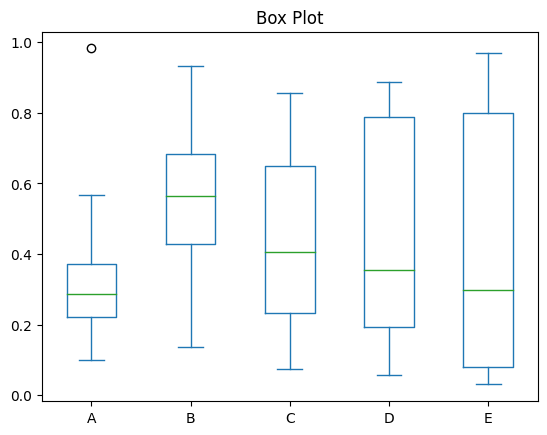

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# rand 균등분포
df = pd.DataFrame(np.random.rand(10,5), columns = ['A','B','C','D','E'])
print(df,'\n')
print(df.describe(),'\n')
# 박스 플롯
df.plot.box()
plt.title('Box Plot')
plt.show()

          A         B         C         D
0  0.785801  0.979665  0.614303  0.228728
1  0.818942  0.180247  0.177603  0.188431
2  0.140232  0.204397  0.638367  0.792342
3  0.433100  0.342125  0.128870  0.602377
4  0.996779  0.715594  0.407884  0.235719 



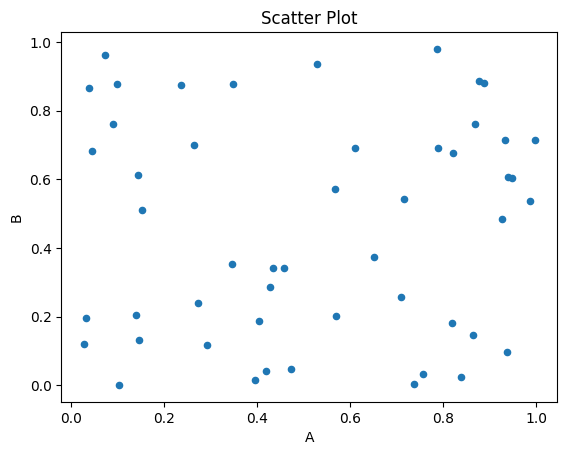

In [7]:
df = pd.DataFrame(np.random.rand(50,4), columns = ['A','B','C','D'])
print(df.head(),'\n')

# 산점도
df.plot.scatter(x='A',y='B')
plt.title('Scatter Plot')
plt.show()

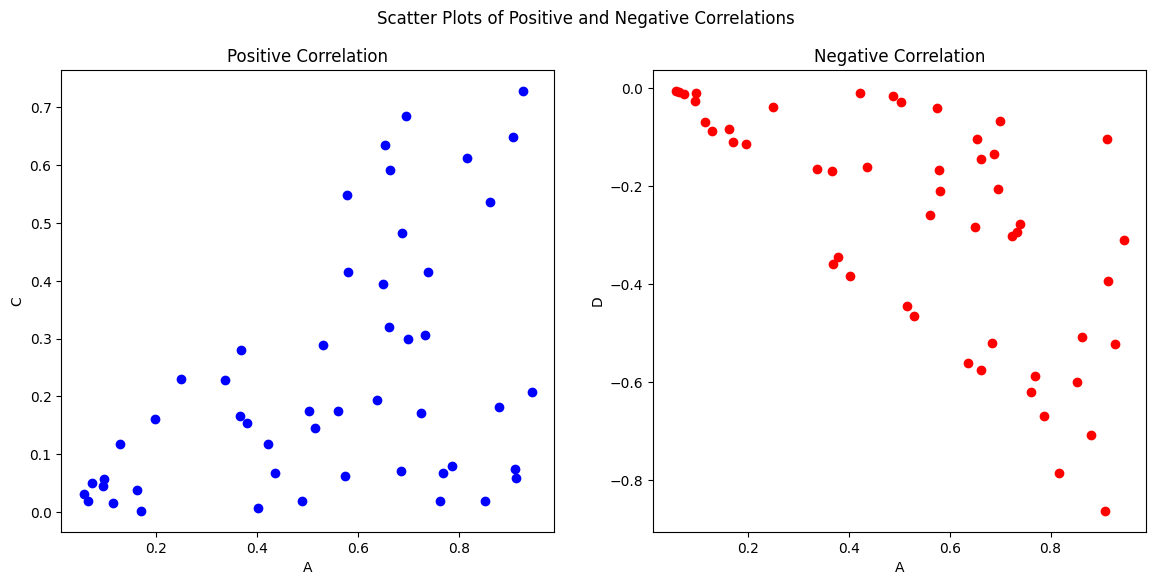

In [11]:
df = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])

# 양의 상관관계
df['C'] = df['A'] * 2 * np.random.rand(50) *0.5

# 음의 상관관계
df['D'] = -df['A'] * 2 * np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'],df['C'],color = 'blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'],df['D'],color = 'red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle("Scatter Plots of Positive and Negative Correlations")
plt.show()

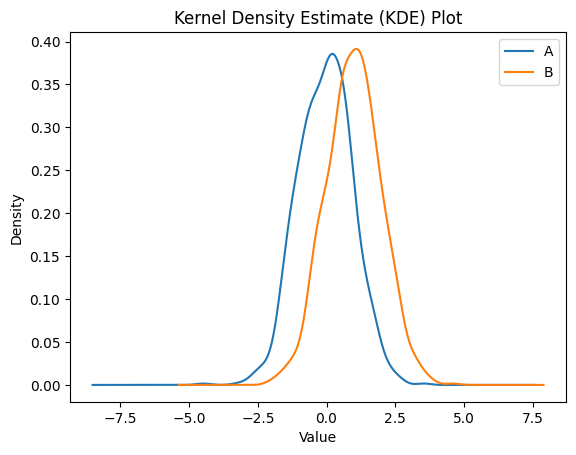

In [10]:
# 커널 밀도 추정(KDE, Kernel Density Estimate)  그래프는 데이터의 분포를 부드럽게 나타내는 그래프
# 데이터 생성
data = pd.DataFrame({
    'A':np.random.randn(1000),
    'B': np.random.randn(1000) +1
})


# KDE 그래프
data['A'].plot.kde(label = 'A')
data['B'].plot.kde(label = 'B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

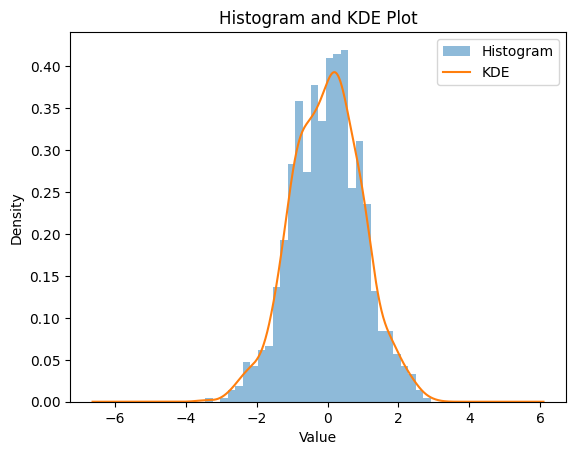

In [12]:
# 데이터 생성
data = pd.Series(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기
ax = data.plot.hist(bins=30,alpha=0.5,density=True,label='Histogram')
data.plot.kde(ax=ax,label='KDE')
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

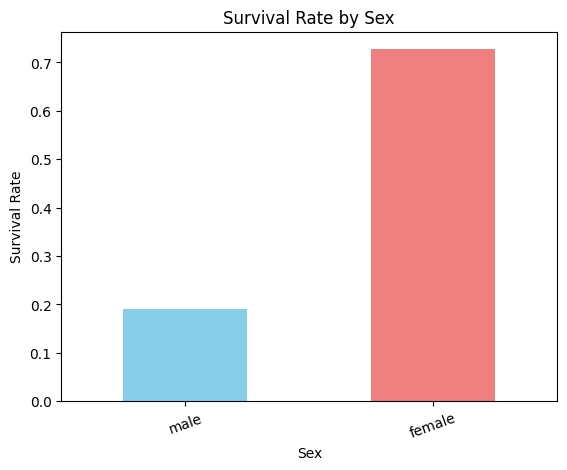

In [97]:
# Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

# pandas 사용

# 성별과 생존율 관계 시각화
survive_sex = df.groupby('sex').survived.mean().sort_values()


# 시각화
# plt.figure(figsize = (8,5))
survive_sex.plot(kind = 'bar', color = ['skyblue', 'lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 20)
plt.show()

In [107]:
# 필요한 열 선택 및 전처리
features = ['pclass','sex','age','sibsp','parch','fare','embarked']
df = df[features+['survived']]

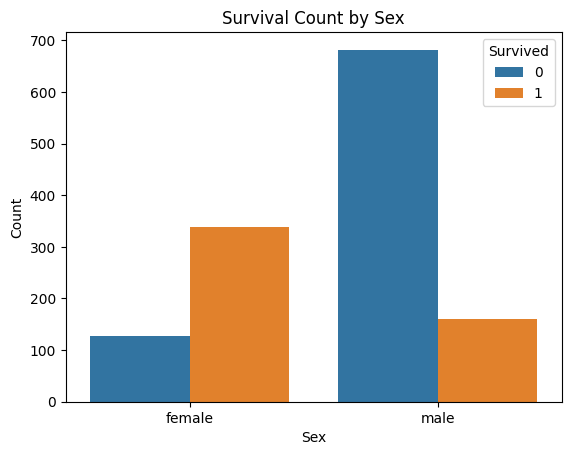

In [108]:
# hue 생존자 수를 카운트
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존,사망) 수 관계 시각화
sns.countplot(x='sex',hue = 'survived',data = df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

In [28]:
df.sex.value_counts()

sex
1    843
0    466
Name: count, dtype: int64

In [14]:
from google.colab import files
# 마운트 안하고 파일 사용하기
# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [89]:
import pandas as pd

# 데이터 프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [56]:
# Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

total = df.groupby('pclass').survived.count() #전체 승객
total_survived = df[df['survived'] ==1].groupby('pclass').survived.count() #생존한 사람
pclass_survival_persent = total_survived / total * 100
pclass_survival_persent = pclass_survival_persent.to_dict()

In [72]:
survive_pclass = df[['pclass','survived']].corr().iloc[0,1]
print(survive_pclass)

-0.31246936264967645


In [101]:
import matplotlib.pyplot as plt

# 기본 색상 확인
colors = plt.cm.colors.cnames
print(colors)


{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

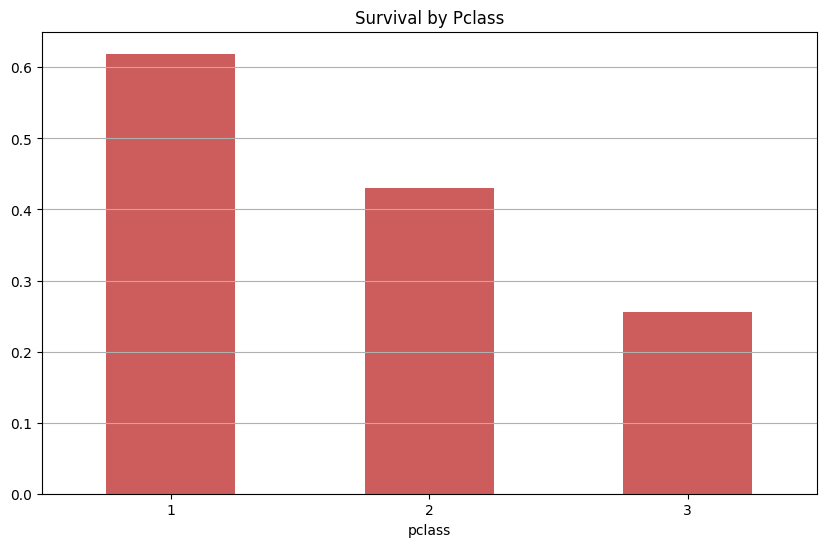

In [116]:
survive_pclass_correlation = df.groupby('pclass')['survived'].mean()

plt.figure(figsize=(10, 6))
survive_pclass_correlation.plot(kind='bar', color='indianred')
plt.title('Survival by Pclass')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

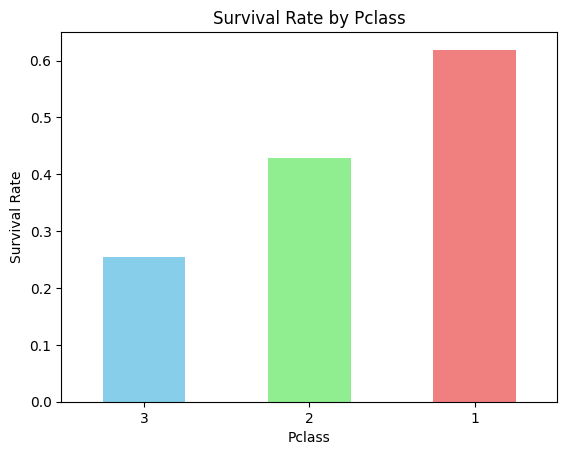

In [112]:
# 승객 등급과 생존율 관계 계산
survival_by_pclass = df.groupby('pclass')['survived'].mean().sort_values()

# 시각화
survival_by_pclass.plot(kind='bar',color=['skyblue','lightgreen','lightcoral'])
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

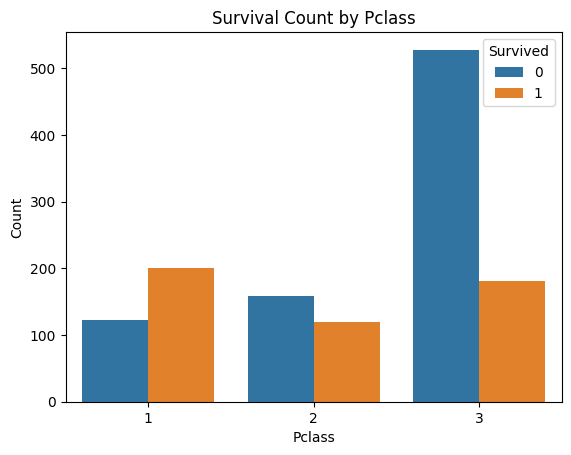

In [113]:
# 승객 등급과 승객(생존,사망)수 관계 시각화
sns.countplot(x='pclass',hue='survived',data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

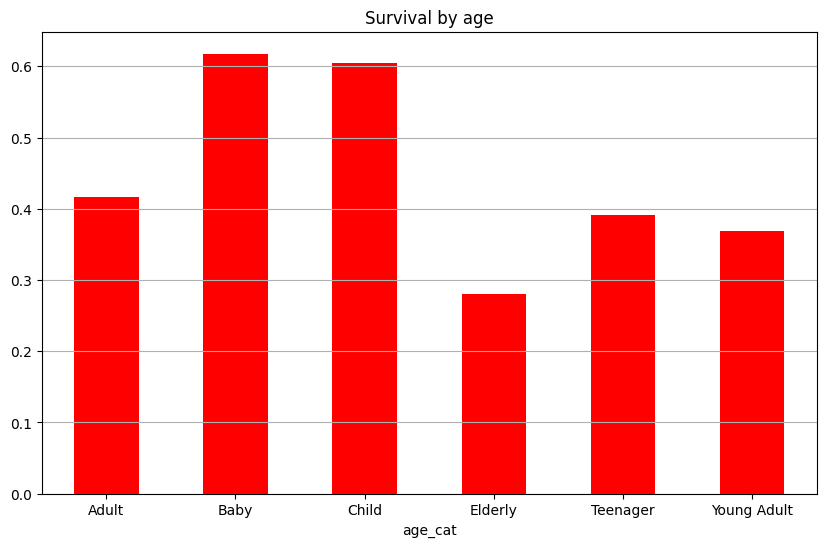

In [79]:
# Q. 나이와 생존율 관계를 시각화하여 출력하세요.

survive_age = df.groupby('age_cat').survived.mean()

plt.figure(figsize=(10,6))
survive_age.plot(kind='bar',color='red')
plt.title('Survival by age')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [78]:
def get_category(age):
    if age < 3:
        return 'Baby'
    elif age <10:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    elif age <30:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Elderly'

        # 'baby' 'child' 'teenager' 'young Adult' 'adult' 'Elderly
df['age_cat'] = df.age.apply(lambda x: get_category(x))
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,mean_fare_by_pclass,survive_pclass,family_size,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",87.508992,61.919505,0,Young Adult
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",87.508992,61.919505,3,Baby
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",87.508992,61.919505,3,Baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",87.508992,61.919505,3,Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",87.508992,61.919505,3,Young Adult


['Young', 'Young', 'Young', 'Middle-aged', 'Middle-aged', 'Middle-aged', 'Middle-aged', 'Senior', 'Senior', 'Senior']
Categories (3, object): ['Young' < 'Middle-aged' < 'Senior']


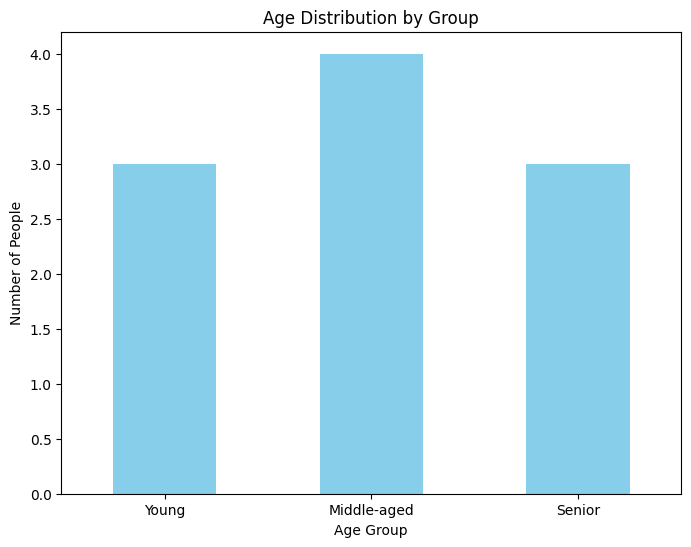

In [137]:
import pandas as pd
# cut() 함수는 주어진 데이터를 구간(또는 범주)으로 나누는 데 사용

#  bins는 나눌 구간의 경계값을 지정하는 데 사용됩니다. 또한, labels 매개변수를 사용하여 각 구간에 라벨을 지정할 수도 있습니다.
# 예시 데이터
ages = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

# 나이 데이터를 세 가지 구간으로 나누기
bins = [0, 30, 50, 100]  # 0~30, 31~50, 51~100 구간으로 나눔
labels = ['Young', 'Middle-aged', 'Senior']  # 각 구간에 대한 라벨
age_groups = pd.cut(ages, bins=bins, labels=labels)

# 결과 출력
print(age_groups)
# 각 구간별 데이터 개수 세기
age_group_counts = age_groups.value_counts()

# 막대그래프로 시각화
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution by Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

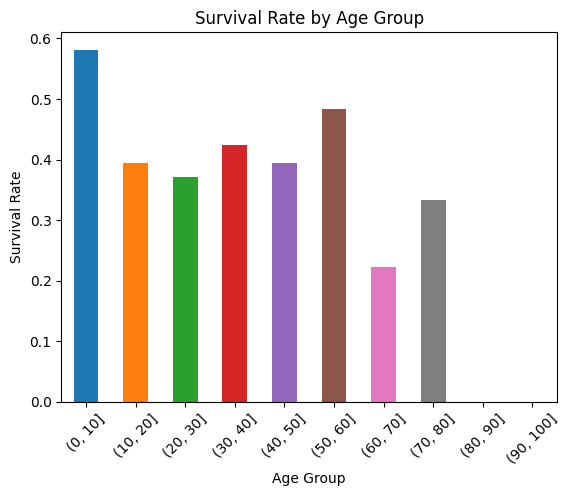

In [129]:
# 나이와 생존율 관계 계산을 위해 나이를 그룹화
# ( 미포함, [ 포함 => 0은 미포함 10은 포함
df['age_group'] = pd.cut(df['age'],bins = [0,10,20,30,40,50,60,70,80,90,100])

# 나이 그룹별 생존율 계산
survival_by_age_group = df.groupby('age_group')['survived'].mean()


# 시각화
# tab10 컬러맵은 10가지 서로 다른 색상을 제공
colors = plt.cm.tab10(np.arange(len(df)))
# survival_by_age_group.plot(kind = 'bar', color=['skyblue','indianred','limegreen','lightsteelblue','mediumorchid','violet'])
survival_by_age_group.plot(kind = 'bar', color=colors)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 45)
plt.show()

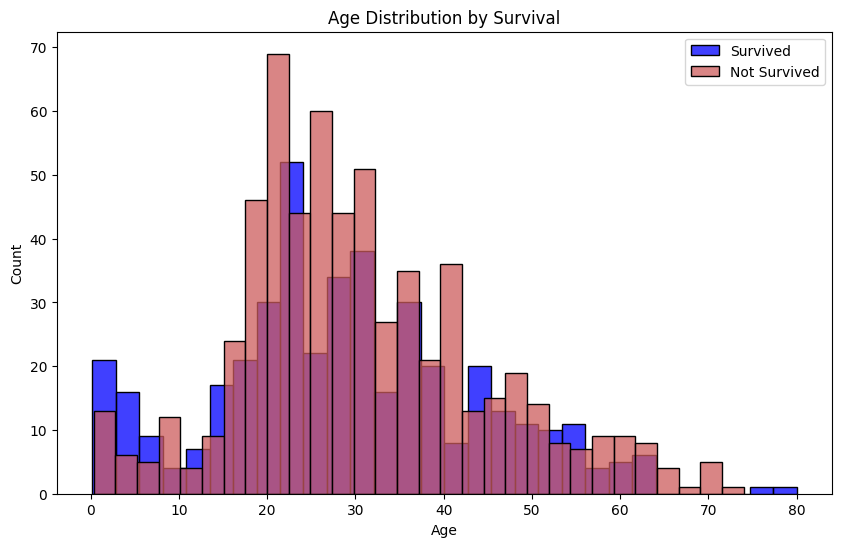

In [131]:
# 나이와 생존,사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived']==1]['age'],bins=30,kde=False,color='blue',label='Survived')
sns.histplot(df[df['survived']==0]['age'],bins=30,kde=False,color='indianred',label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [86]:
def fare_rank(fare):
    if fare <30:
        return '30 under'
    elif fare < 50:
        return '50 under'
    elif fare <100:
        return '100 under'
    elif fare <200:
        return '200 under'
    else:
        return '200 up'
df['fare_rank'] = df.fare.apply(lambda x : fare_rank(x))


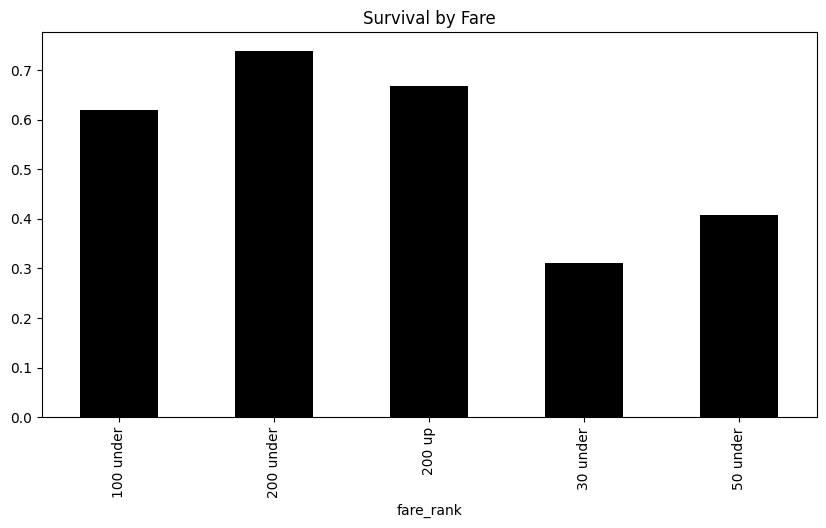

In [87]:
# Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

survive_fare = df.groupby('fare_rank').survived.mean()

plt.figure(figsize=(10,5))
survive_fare.plot(kind='bar',color='black')
plt.title('Survival by Fare')
plt.show()

fare_group
(0, 50]       0.323501
(50, 100]     0.628205
(100, 150]    0.787879
(150, 200]    0.615385
(200, 250]    0.571429
(250, 300]    0.769231
(300, 350]         NaN
(350, 400]         NaN
(400, 450]         NaN
(450, 500]         NaN
Name: survived, dtype: float64


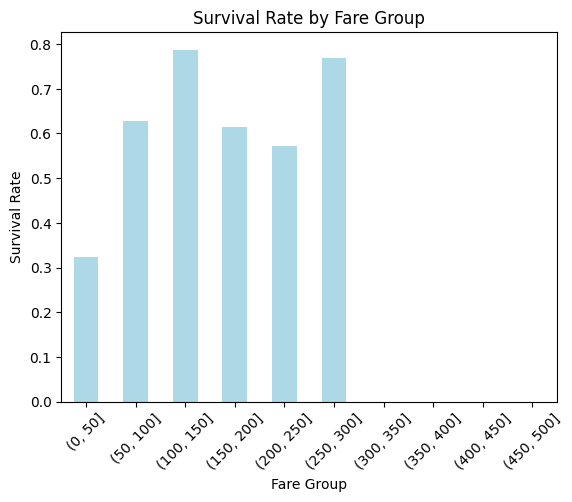

In [138]:
# 요금과 생존율 관계 계산을 위해 나이를 그룹화
# ( 미포함, [ 포함 => 0은 미포함 10은 포함
df['fare_group'] = pd.cut(df['fare'],bins = [0,50,100,150,200,250,300,350,400,450,500])


survival_by_fare_group = df.groupby('fare_group')['survived'].mean()
print(survival_by_fare_group)

survival_by_fare_group.plot(kind='bar',color='lightblue')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

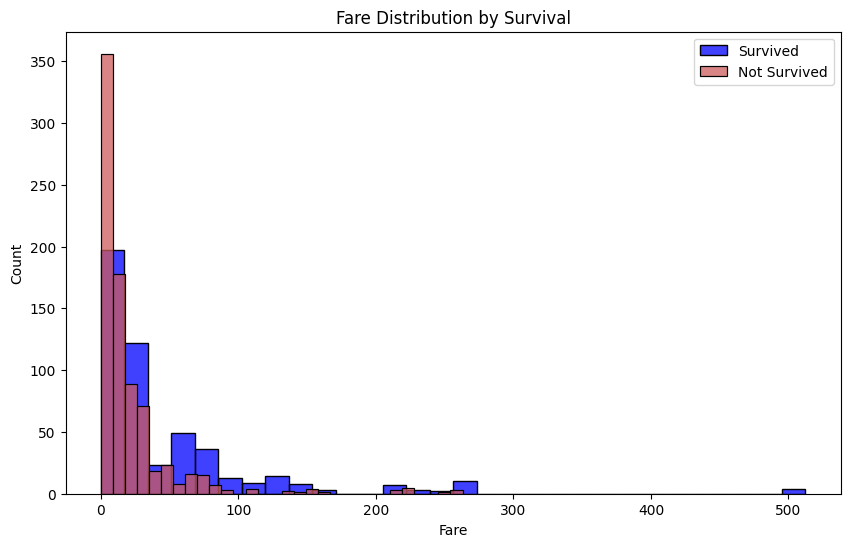

In [140]:
# 요금과 생존,사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived']==1]['fare'],bins=30,kde=False,color='blue',label='Survived')
sns.histplot(df[df['survived']==0]['fare'],bins=30,kde=False,color='indianred',label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

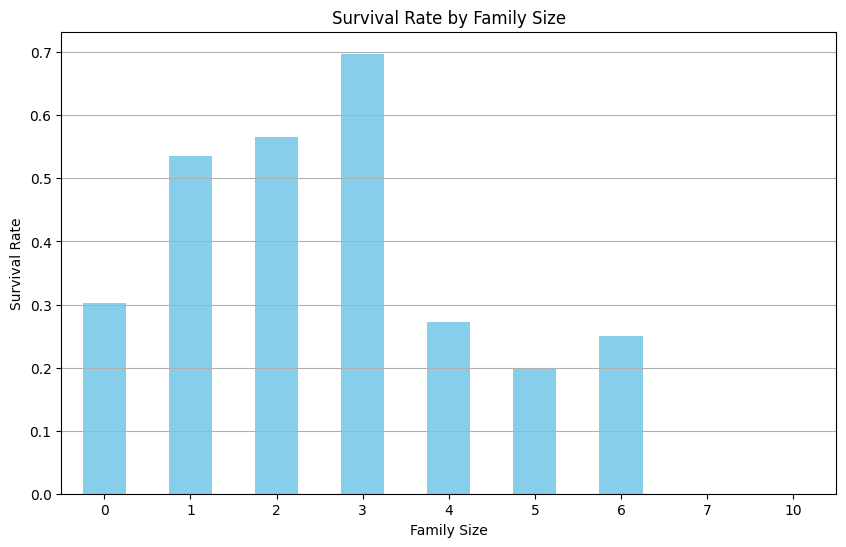

In [75]:
# Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

df['family_size'] = df['sibsp']+df['parch']
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



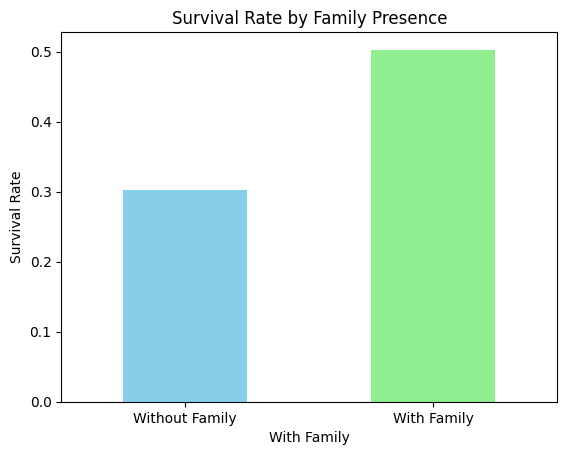

In [141]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

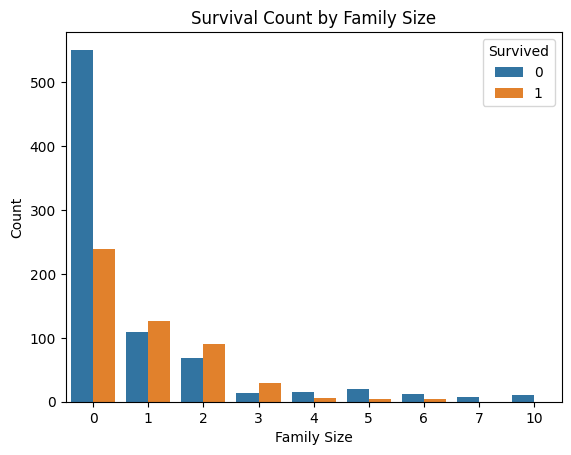

In [142]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()